# Time Series

In [1]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('book_sales.csv')

In [36]:
df.head()

,created,sales
0,2021-08-24 00:11:57,10.538875
1,2021-08-18 14:32:47,9.694154
2,2021-08-18 16:00:58,10.873147
3,2021-08-23 05:44:04,11.065694
4,2021-08-14 18:00:37,10.357464


<AxesSubplot:>

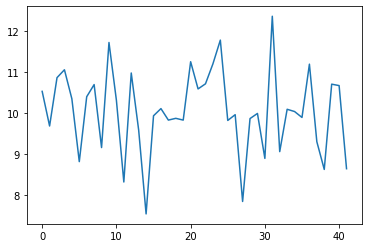

In [23]:
df.sales.plot()

In [45]:
df.sort_values(by='created', inplace=True)
df.reset_index(drop=True, inplace=True)

<AxesSubplot:>

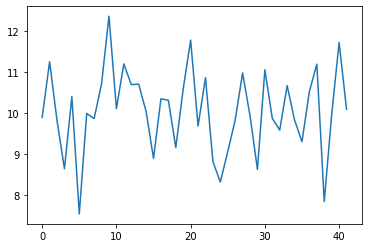

In [26]:
df.sales.plot()

In [46]:
# Add dummy time

df['Time'] = np.arange(len(df.index))

# Adds tendency to sales

df['sales'] = df['sales'].map(lambda x: np.exp(x)/100 - np.log(x))

df.head()

,created,sales,Time
0,2021-08-01 14:24:37,197.468624,0
1,2021-08-02 12:18:19,775.521577,1
2,2021-08-02 23:25:13,183.405883,2
3,2021-08-03 18:43:25,55.067680,3
4,2021-08-05 01:26:15,329.067110,4


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

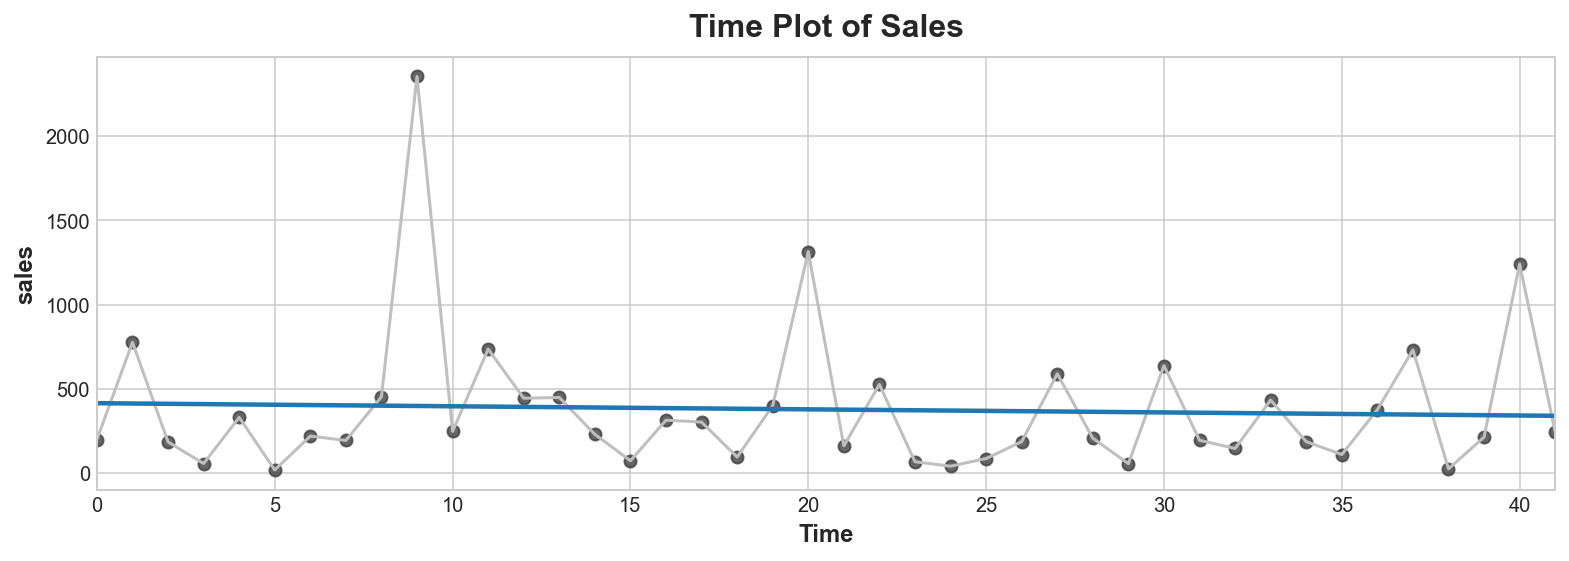

In [47]:
# target = weight * time + bias

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
#%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'sales', data=df, color='0.75')
ax = sns.regplot(x='Time', y='sales', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Sales');

In [48]:
# Addd lags

df.set_index('created', inplace=True)

df['Lag_1'] = df['sales'].shift(1)

df = df.reindex(columns=['sales', 'Lag_1'])

df.head()

,sales,Lag_1
created,,
2021-08-01 14:24:37,197.468624,NaN
2021-08-02 12:18:19,775.521577,197.468624
2021-08-02 23:25:13,183.405883,775.521577
2021-08-03 18:43:25,55.067680,183.405883
2021-08-05 01:26:15,329.067110,55.067680


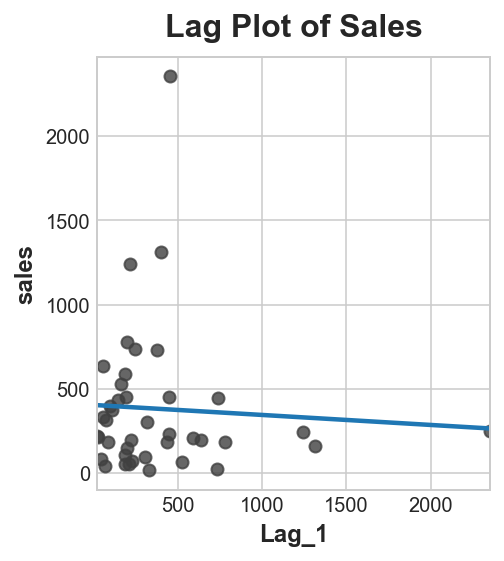

In [49]:
# target = weight * lag + bias

fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='sales', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Sales');

In [54]:
# To fit a linear regression

from sklearn.linear_model import LinearRegression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [51]:
df['Time'] = np.arange(len(df.index))
df.head()

,sales,Lag_1,Time
created,,,
2021-08-01 14:24:37,197.468624,NaN,0
2021-08-02 12:18:19,775.521577,197.468624,1
2021-08-02 23:25:13,183.405883,775.521577,2
2021-08-03 18:43:25,55.067680,183.405883,3
2021-08-05 01:26:15,329.067110,55.067680,4


In [52]:
# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

/Users/anieto/miniconda3/envs/z.text/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


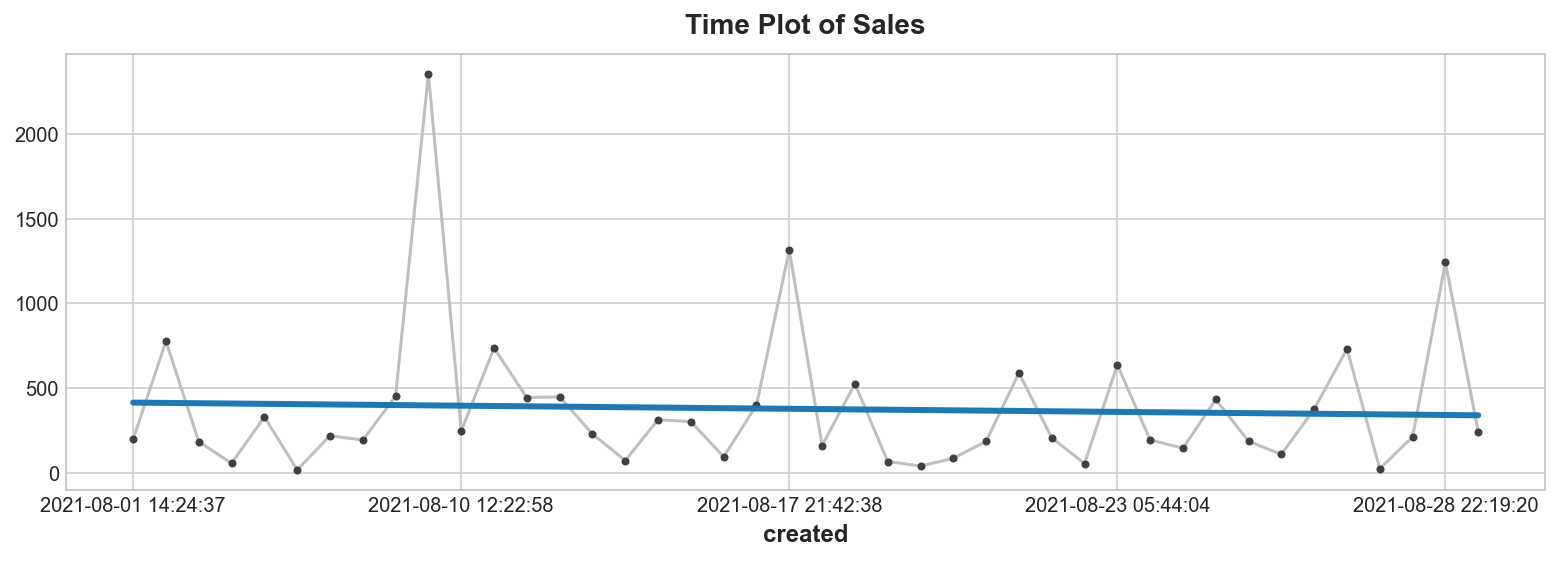

In [55]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Sales');

In [56]:
X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'sales']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

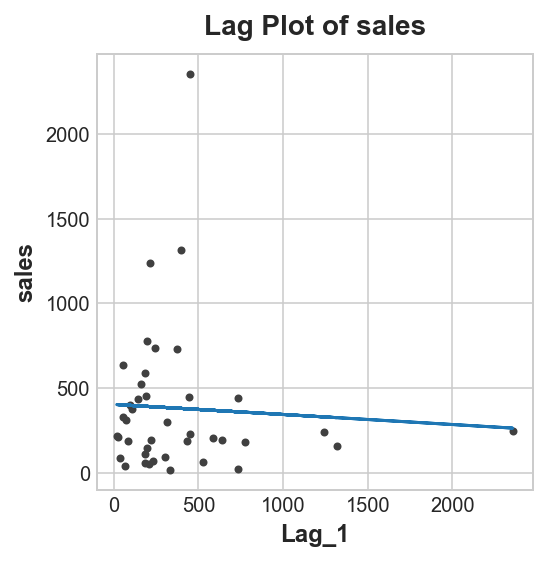

In [57]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('sales')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of sales');

/Users/anieto/miniconda3/envs/z.text/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


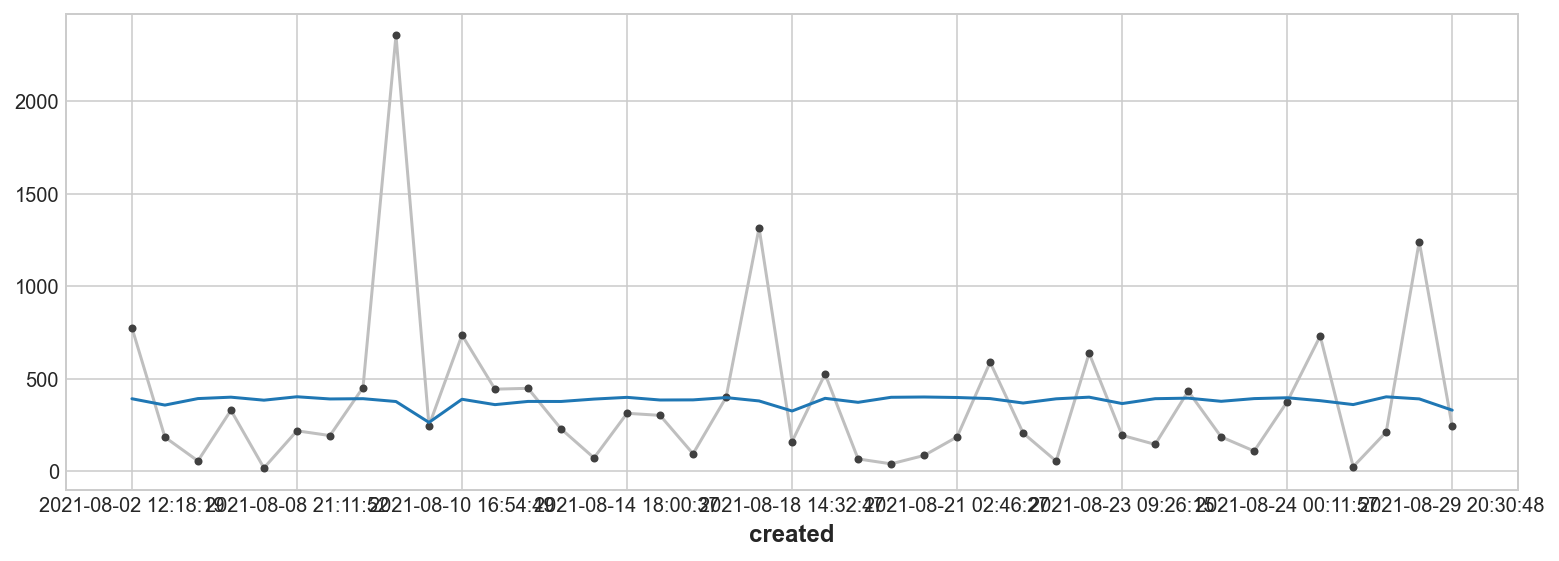

In [58]:
ax = y.plot(**plot_params)
ax = y_pred.plot()